# Sales Prediction

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Reading the csv file
df = pd.read_csv('advertising.csv')
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Preprocessing

In [3]:
# Getting the size of the dataset
df.size

800

In [4]:
# Getting shape of the dataset
df.shape

(200, 4)

In [5]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# Descriptive statistical analysis of data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
print(df[df['Radio']==0].shape[0])

1


In [12]:
print(df[df['TV']==0].shape[0])

0


In [13]:
print(df[df['Newspaper']==0].shape[0])

0


In [14]:
print(df[df['Sales']==0].shape[0])

0


In [16]:
df['Radio']=df['Radio'].replace(0,df['Radio'].mean())
print(df[df['Radio']==0].shape[0])

0


In [17]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.380320,30.554000,15.130500
std,85.854236,14.754473,21.778621,5.283892
min,0.700000,0.300000,0.300000,1.600000
25%,74.375000,10.075000,12.750000,11.000000
50%,149.750000,23.282000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


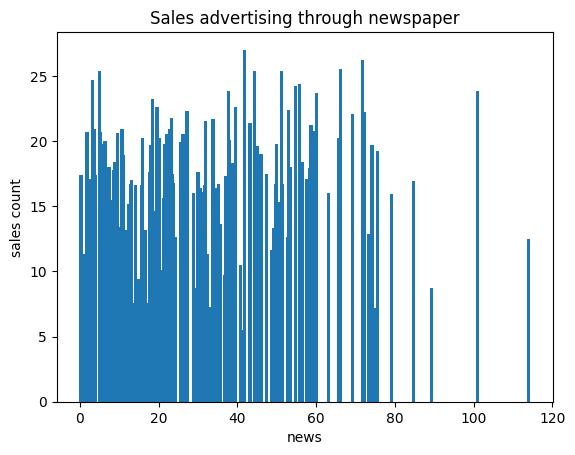

In [19]:
# Define X and Y variable data 
x = df['Newspaper']
y =df['Sales']
  
plt.bar(x, y) 
plt.xlabel("news")  # add X-axis label 
plt.ylabel("sales count")  # add Y-axis label 
plt.title("Sales advertising through newspaper")  # add title 
plt.show() 

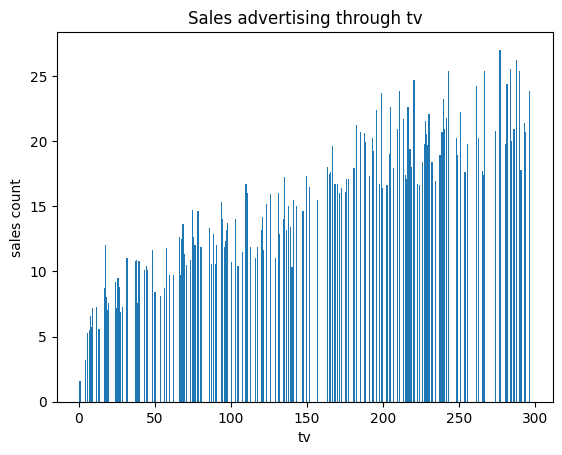

In [30]:
# Define X and Y variable data 
x = df['TV']
y =df['Sales']
  
plt.bar(x,y) 
plt.xlabel("tv")  # add X-axis label 
plt.ylabel("sales count")  # add Y-axis label 
plt.title("Sales advertising through tv")  # add title 
plt.show() 

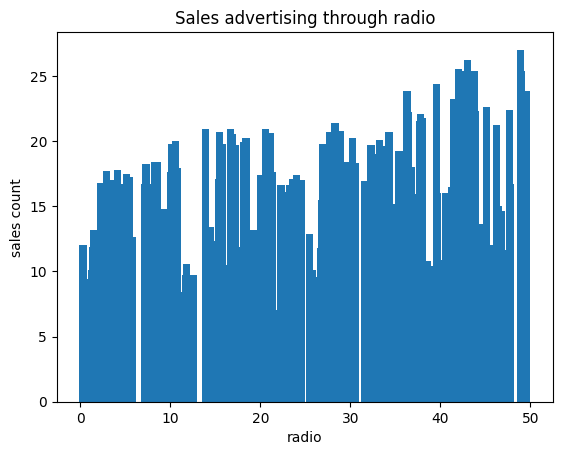

In [31]:
# Define X and Y variable data 
x = df['Radio']
y =df['Sales']
  
plt.bar(x,y) 
plt.xlabel("radio")  # add X-axis label 
plt.ylabel("sales count")  # add Y-axis label 
plt.title("Sales advertising through radio")  # add title 
plt.show() 

<AxesSubplot:xlabel='Sales', ylabel='Density'>

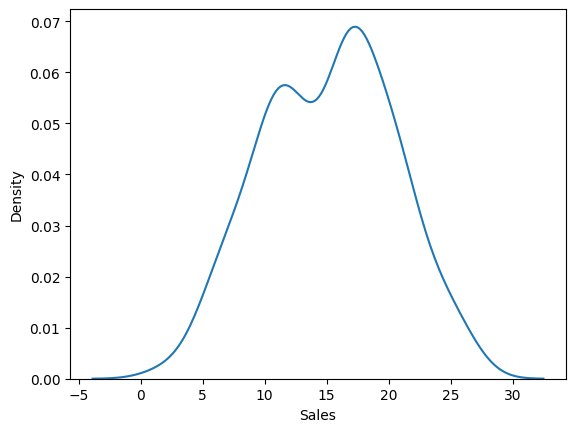

In [27]:
sns.kdeplot(df['Sales'])

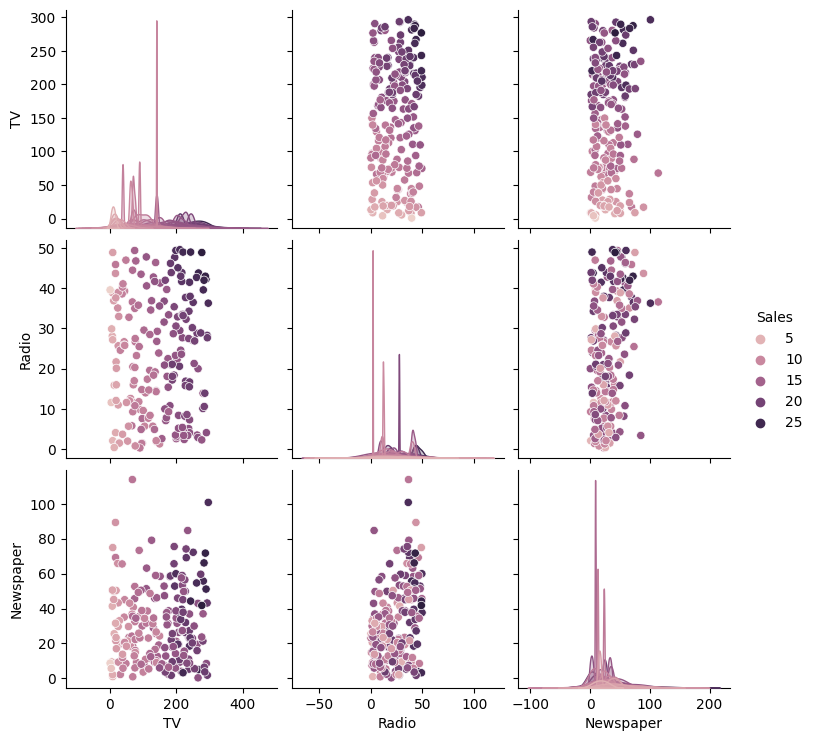

In [32]:
sns.pairplot(df,hue='Sales')

<AxesSubplot:>

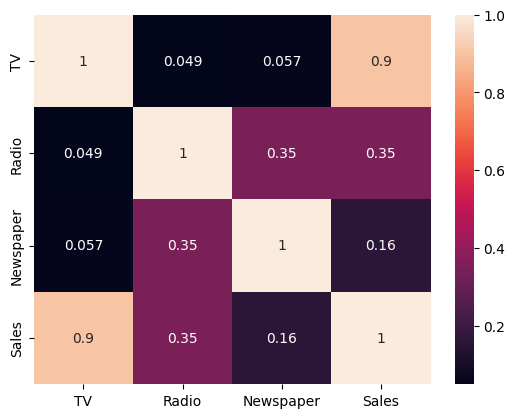

In [33]:
# Heatmap Plot of correlation
sns.heatmap(df.corr(),annot=True)

In [34]:
x = df.iloc[:, 0:3]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [35]:
y = df.iloc[:, -1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [36]:
# Importing train test split library
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(x_test)
y_pred

array([17.04241234, 20.44874755, 23.74031686,  9.26763264, 21.71394987,
       12.57127093, 21.1097338 ,  8.64031574, 17.19411968, 16.65468925,
        8.88918091,  8.42554197, 18.18524579,  8.04019793, 12.59323642,
       14.89525784,  8.10654683, 17.88655774, 10.98050228, 20.47753588,
       20.82940334, 12.61874675, 10.90034171, 22.42100309,  9.36185936,
        7.86006833, 20.86742909, 13.77949794, 10.72793928,  7.89340476,
       15.91444523, 10.60237601, 20.84714056, 10.45309742, 21.56724588,
       21.19292865, 12.13512904, 22.82876424, 12.57040679,  6.39517332])

In [39]:
model.intercept_

4.63311014171928

In [40]:
model.coef_

array([0.05463921, 0.10263457, 0.00460239])

In [41]:
from sklearn import metrics

# Mean Absolute Error 
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_pred, y_test))

Mean Absolute Error:  1.2723232354656684


In [42]:
# Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Root Mean Squared Error: 1.6989712668980703


In [43]:
# R-Squared
print('R-Squared: ', metrics.r2_score(y_pred, y_test))

R-Squared:  0.8976490202894339


In [44]:
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,16.9,17.042412
1,22.4,20.448748
2,21.4,23.740317
3,7.3,9.267633
4,24.7,21.713950
5,12.6,12.571271
6,22.3,21.109734
7,8.4,8.640316
8,16.5,17.194120
9,16.1,16.654689


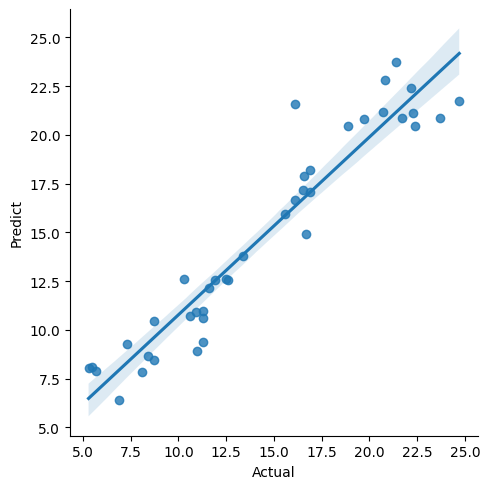

In [45]:
# Actual and Predicted Visualization
sns.lmplot(data = act_pred, x= 'Actual', y = "Predict")

import warnings
warnings.filterwarnings("ignore")

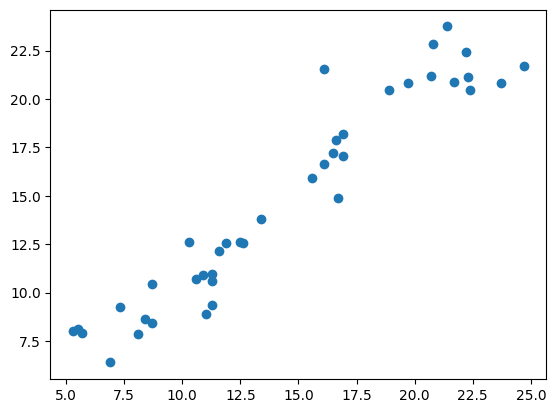

In [46]:
plt.scatter(y_test , y_pred)

# Conclusion

###### In this task, I have used the Advertising Dataset.
Then, I did an analysis and visualization of the dataset.
And then I trained the model using Linear Regression Algorithm and predicted the values.
Made a dataframe of actual and predicted values.
Finally, made a visualization of actual and predicted values.